# Compare Indicators

Fetch multiple indicators and merge them into a single DataFrame for
cross-indicator analysis.

In [1]:
from esios import ESIOSClient

client = ESIOSClient()

## Multi-geo compare

Without a geo filter, `compare()` returns a MultiIndex column
`(indicator_name, geo_name)` — one column per indicator×geo combo:

In [2]:
df = client.indicators.compare(
    [600, 612],
    start="2025-01-01",
    end="2025-01-07",
)
df

indicator                 Precio mercado SPOT Diario                           \
geo                                         Portugal Francia  España Alemania   
datetime                                                                        
2025-01-01 00:00:00+01:00                     134.49   12.36  134.49     2.16   
2025-01-01 00:15:00+01:00                     134.49   12.36  134.49     2.16   
2025-01-01 00:30:00+01:00                     134.49   12.36  134.49     2.16   
2025-01-01 00:45:00+01:00                     134.49   12.36  134.49     2.16   
2025-01-01 01:00:00+01:00                     131.59   18.92  131.59     1.60   
...                                              ...     ...     ...      ...   
2025-01-07 22:45:00+01:00                      98.53   98.53   98.53    72.45   
2025-01-07 23:00:00+01:00                      89.27   89.27   89.27    50.04   
2025-01-07 23:15:00+01:00                      89.27   89.27   89.27    50.04   
2025-01-07 23:30:00+01:00                      89.27   89.27   89.27    50.04   
2025-01-07 23:45:00+01:00                      89.27   89.27   89.27    50.04   

indicator                                       \
geo                       Bélgica Países Bajos   
datetime                                         
2025-01-01 00:00:00+01:00   10.62        13.62   
2025-01-01 00:15:00+01:00   10.62        13.62   
2025-01-01 00:30:00+01:00   10.62        13.62   
2025-01-01 00:45:00+01:00   10.62        13.62   
2025-01-01 01:00:00+01:00   10.27         6.24   
...                           ...          ...   
2025-01-07 22:45:00+01:00  111.04        82.20   
2025-01-07 23:00:00+01:00  107.09        80.01   
2025-01-07 23:15:00+01:00  107.09        80.01   
2025-01-07 23:30:00+01:00  107.09        80.01   
2025-01-07 23:45:00+01:00  107.09        80.01   

indicator                 Precio mercado SPOT Intradiario Sesión 1          
geo                                                       Portugal  España  
datetime                                                                    
2025-01-01 00:00:00+01:00                                   129.89  129.89  
2025-01-01 00:15:00+01:00                                   129.89  129.89  
2025-01-01 00:30:00+01:00                                   129.89  129.89  
2025-01-01 00:45:00+01:00                                   129.89  129.89  
2025-01-01 01:00:00+01:00                                   126.59  126.59  
...                                                            ...     ...  
2025-01-07 22:45:00+01:00                                    98.97   98.97  
2025-01-07 23:00:00+01:00                                    92.27   92.27  
2025-01-07 23:15:00+01:00                                    92.27   92.27  
2025-01-07 23:30:00+01:00                                    92.27   92.27  
2025-01-07 23:45:00+01:00                                    92.27   92.27  

[672 rows x 8 columns]

## Filtering to one country

With `geo_ids`, each indicator returns a single column, so the result
has flat columns named by indicator:

In [3]:
handle = client.indicators.get(600)
spain_id = handle.resolve_geo("España")

df = client.indicators.compare(
    [600, 612, 613, 614],
    start="2025-01-01",
    end="2025-01-07",
    geo_ids=[spain_id],
)
df

,Precio mercado SPOT Diario,Precio mercado SPOT Intradiario Sesión 1,Precio mercado SPOT Intradiario Sesión 2,Precio mercado SPOT Intradiario Sesión 3
datetime,,,,
2025-01-01 00:00:00+01:00,134.49,129.89,132.49,NaN
2025-01-01 00:15:00+01:00,134.49,129.89,132.49,NaN
2025-01-01 00:30:00+01:00,134.49,129.89,132.49,NaN
2025-01-01 00:45:00+01:00,134.49,129.89,132.49,NaN
2025-01-01 01:00:00+01:00,131.59,126.59,122.43,NaN
...,...,...,...,...
2025-01-07 22:45:00+01:00,98.53,98.97,102.63,98.53
2025-01-07 23:00:00+01:00,89.27,92.27,89.00,84.27
2025-01-07 23:15:00+01:00,89.27,92.27,89.00,84.27


## Visualize

<Axes: title={'center': 'Market Session Prices — España (€/MWh)'}, xlabel='datetime'>

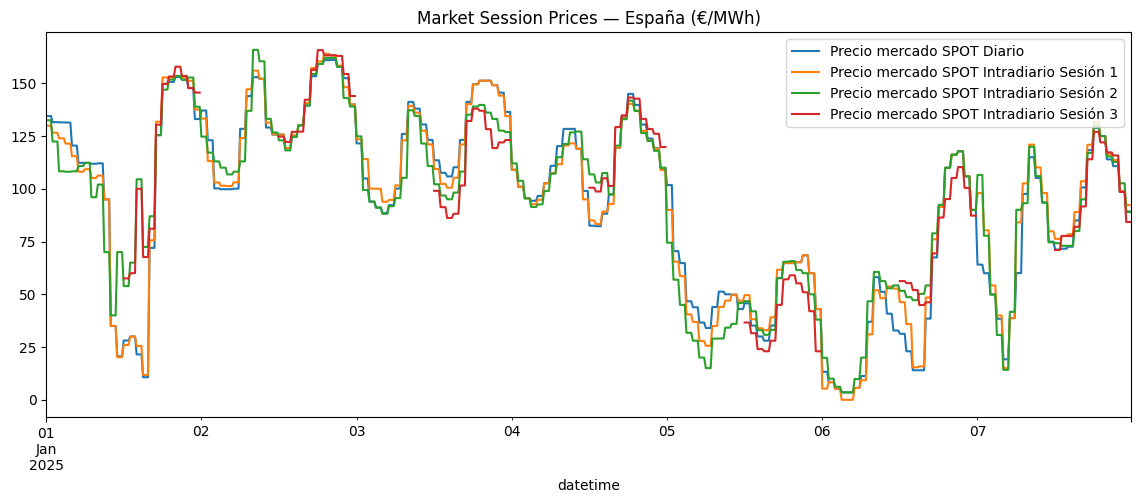

In [4]:
df.plot(figsize=(14, 5), title="Market Session Prices — España (€/MWh)")

## Statistical summary

In [5]:
df.describe().round(2)

,Precio mercado SPOT Diario,Precio mercado SPOT Intradiario Sesión 1,Precio mercado SPOT Intradiario Sesión 2,Precio mercado SPOT Intradiario Sesión 3
count,672.00,672.00,672.00,336.00
mean,92.74,93.22,93.43,101.79
std,43.26,42.73,39.99,39.27
min,3.52,-0.01,3.52,23.00
25%,58.04,57.50,60.46,70.60
50%,100.42,102.00,102.81,103.28
75%,126.60,124.29,123.39,130.83
max,161.10,163.99,165.88,165.77
